In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
df_elec = pd.read_csv("/Users/erinmurphy/Documents/GitHub/union-viz/recent_election_results__2008-22.csv")

df_elec.head()

,Region,Case Number,Case Name,Status,Date Filed,Date Closed,Reason Closed,City,States & Territories,Unit ID,...,Votes Against,Total Ballots Counted,Runoff Required,Challenged Ballots,Challenges are Determinative,Union to Certify,Voting Unit (Unit A),Voting Unit (Unit B),Voting Unit (Unit C),Voting Unit (Unit D)
0,"Region 15, New Orleans, Louisiana",15-RC-308212,"First Student, Inc.",Closed,12/05/2022,01/09/2023,Certific. of Representative,Memphis,TN,A,...,NaN,3.0,NaN,NaN,NaN,Teamsters Local 667,Included: All full-time and regular part-time...,NaN,NaN,NaN
1,"Region 18, Minneapolis, Minnesota",18-RC-308305,"UNFI Wholesale, Inc.",Closed,12/05/2022,01/06/2023,Certification of Results,Hopkins,MN,A,...,1.0,9.0,NaN,NaN,NaN,Teamsters Local No. 120,All full-time and regular part-time inventory ...,NaN,NaN,NaN
2,"Region 13, Chicago, Illinois",13-RC-300655,Victory Gardens Theater,Open,08/03/2022,NaN,NaN,Chicago,IL,A,...,NaN,NaN,NaN,NaN,NaN,NaN,Included:\tAll full-time and regular part-time...,NaN,NaN,NaN
3,"Region 19, Seattle, Washington",19-RC-306228,Albany General Hospital d/b/a Samaritan Albany...,Closed,10/31/2022,01/09/2023,Certification of Results,Albany,OR,A,...,NaN,2.0,NaN,1.0,NaN,Oregon Nurses Association,Included: All full-time and regular part-time ...,NaN,NaN,NaN
4,"Region 20, San Francisco, California",20-RC-307019,Dignity Health d/b/a St. Mary’s Medical Center,Closed,11/14/2022,01/24/2023,Certification of Results,San Francisco,CA,A,...,4.0,30.0,NaN,NaN,NaN,"Service Employees International Union, United ...","All full-time, regular part-time, and per diem...",NaN,NaN,NaN


In [4]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25505 entries, 0 to 25504
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        25505 non-null  object 
 1   Case Number                   25505 non-null  object 
 2   Case Name                     25505 non-null  object 
 3   Status                        25505 non-null  object 
 4   Date Filed                    25505 non-null  object 
 5   Date Closed                   25334 non-null  object 
 6   Reason Closed                 25333 non-null  object 
 7   City                          25505 non-null  object 
 8   States & Territories          25505 non-null  object 
 9   Unit ID                       25505 non-null  object 
 10  Ballot Type                   25505 non-null  object 
 11  Tally Type                    25504 non-null  object 
 12  Tally Date                    25505 non-null  object 
 13  N

In [5]:
df_elec.describe()

,No of Eligible Voters,Void Ballots,Votes for Labor Union1,Votes for Labor Union2,Votes for Labor Union3,Votes Against,Total Ballots Counted,Challenged Ballots
count,25453.000000,4374.000000,24499.000000,816.000000,62.000000,20537.000000,24828.000000,9655.000000
mean,69.697324,4.036351,30.183722,87.276961,20.193548,26.098262,54.397213,5.686587
std,425.204643,25.788739,128.784942,921.963285,37.943806,64.382720,303.599639,24.032972
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,11.000000,1.000000,5.000000,4.000000,3.000000,4.000000,9.000000,1.000000
50%,26.000000,1.000000,12.000000,11.000000,7.000000,10.000000,21.000000,2.000000
75%,64.000000,3.000000,29.000000,33.000000,18.000000,25.000000,52.000000,5.000000
max,44919.000000,1222.000000,13101.000000,18844.000000,186.000000,2244.000000,32279.000000,1601.000000


In [6]:
df_elec.shape

(25505, 31)

In [7]:
# change Date Filed column name to date_filed
df_elec.rename(columns={'Date Filed': 'date_filed', 'Tally Date': 'tally_date', 'States & Territories': 'states'}, inplace=True)

In [8]:
#lowercase column names
df_elec.columns = df_elec.columns.str.lower()

In [9]:
df_elec.head()

,region,case number,case name,status,date_filed,date closed,reason closed,city,states,unit id,...,votes against,total ballots counted,runoff required,challenged ballots,challenges are determinative,union to certify,voting unit (unit a),voting unit (unit b),voting unit (unit c),voting unit (unit d)
0,"Region 15, New Orleans, Louisiana",15-RC-308212,"First Student, Inc.",Closed,12/05/2022,01/09/2023,Certific. of Representative,Memphis,TN,A,...,NaN,3.0,NaN,NaN,NaN,Teamsters Local 667,Included: All full-time and regular part-time...,NaN,NaN,NaN
1,"Region 18, Minneapolis, Minnesota",18-RC-308305,"UNFI Wholesale, Inc.",Closed,12/05/2022,01/06/2023,Certification of Results,Hopkins,MN,A,...,1.0,9.0,NaN,NaN,NaN,Teamsters Local No. 120,All full-time and regular part-time inventory ...,NaN,NaN,NaN
2,"Region 13, Chicago, Illinois",13-RC-300655,Victory Gardens Theater,Open,08/03/2022,NaN,NaN,Chicago,IL,A,...,NaN,NaN,NaN,NaN,NaN,NaN,Included:\tAll full-time and regular part-time...,NaN,NaN,NaN
3,"Region 19, Seattle, Washington",19-RC-306228,Albany General Hospital d/b/a Samaritan Albany...,Closed,10/31/2022,01/09/2023,Certification of Results,Albany,OR,A,...,NaN,2.0,NaN,1.0,NaN,Oregon Nurses Association,Included: All full-time and regular part-time ...,NaN,NaN,NaN
4,"Region 20, San Francisco, California",20-RC-307019,Dignity Health d/b/a St. Mary’s Medical Center,Closed,11/14/2022,01/24/2023,Certification of Results,San Francisco,CA,A,...,4.0,30.0,NaN,NaN,NaN,"Service Employees International Union, United ...","All full-time, regular part-time, and per diem...",NaN,NaN,NaN


In [10]:
# add underscore to column names
df_elec.columns = df_elec.columns.str.replace(' ', '_')
df_elec.head()

,region,case_number,case_name,status,date_filed,date_closed,reason_closed,city,states,unit_id,...,votes_against,total_ballots_counted,runoff_required,challenged_ballots,challenges_are_determinative,union_to_certify,voting_unit_(unit_a),voting_unit_(unit_b),voting_unit_(unit_c),voting_unit_(unit_d)
0,"Region 15, New Orleans, Louisiana",15-RC-308212,"First Student, Inc.",Closed,12/05/2022,01/09/2023,Certific. of Representative,Memphis,TN,A,...,NaN,3.0,NaN,NaN,NaN,Teamsters Local 667,Included: All full-time and regular part-time...,NaN,NaN,NaN
1,"Region 18, Minneapolis, Minnesota",18-RC-308305,"UNFI Wholesale, Inc.",Closed,12/05/2022,01/06/2023,Certification of Results,Hopkins,MN,A,...,1.0,9.0,NaN,NaN,NaN,Teamsters Local No. 120,All full-time and regular part-time inventory ...,NaN,NaN,NaN
2,"Region 13, Chicago, Illinois",13-RC-300655,Victory Gardens Theater,Open,08/03/2022,NaN,NaN,Chicago,IL,A,...,NaN,NaN,NaN,NaN,NaN,NaN,Included:\tAll full-time and regular part-time...,NaN,NaN,NaN
3,"Region 19, Seattle, Washington",19-RC-306228,Albany General Hospital d/b/a Samaritan Albany...,Closed,10/31/2022,01/09/2023,Certification of Results,Albany,OR,A,...,NaN,2.0,NaN,1.0,NaN,Oregon Nurses Association,Included: All full-time and regular part-time ...,NaN,NaN,NaN
4,"Region 20, San Francisco, California",20-RC-307019,Dignity Health d/b/a St. Mary’s Medical Center,Closed,11/14/2022,01/24/2023,Certification of Results,San Francisco,CA,A,...,4.0,30.0,NaN,NaN,NaN,"Service Employees International Union, United ...","All full-time, regular part-time, and per diem...",NaN,NaN,NaN


In [11]:
# change values in date_filed, tally_date, date_closed columns to datetime  
df_elec['date_filed'] = pd.to_datetime(df_elec['date_filed'])  
df_elec['tally_date'] = pd.to_datetime(df_elec['tally_date'])
df_elec['date_closed'] = pd.to_datetime(df_elec['date_closed'])

df_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25505 entries, 0 to 25504
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   region                        25505 non-null  object        
 1   case_number                   25505 non-null  object        
 2   case_name                     25505 non-null  object        
 3   status                        25505 non-null  object        
 4   date_filed                    25505 non-null  datetime64[ns]
 5   date_closed                   25334 non-null  datetime64[ns]
 6   reason_closed                 25333 non-null  object        
 7   city                          25505 non-null  object        
 8   states                        25505 non-null  object        
 9   unit_id                       25505 non-null  object        
 10  ballot_type                   25505 non-null  object        
 11  tally_type                  

In [12]:
#check dtype of date_filed
df_elec['date_filed'].dtype

dtype('<M8[ns]')

In [13]:
df_elec['year_filed'] = df_elec['date_filed'].dt.year
df_elec['year_closed'] = df_elec['date_closed'].dt.year
df_elec['year_tallied'] = df_elec['tally_date'].dt.year

df_elec.head(3)

,region,case_number,case_name,status,date_filed,date_closed,reason_closed,city,states,unit_id,...,challenged_ballots,challenges_are_determinative,union_to_certify,voting_unit_(unit_a),voting_unit_(unit_b),voting_unit_(unit_c),voting_unit_(unit_d),year_filed,year_closed,year_tallied
0,"Region 15, New Orleans, Louisiana",15-RC-308212,"First Student, Inc.",Closed,2022-12-05,2023-01-09,Certific. of Representative,Memphis,TN,A,...,NaN,NaN,Teamsters Local 667,Included: All full-time and regular part-time...,NaN,NaN,NaN,2022,2023.0,2022
1,"Region 18, Minneapolis, Minnesota",18-RC-308305,"UNFI Wholesale, Inc.",Closed,2022-12-05,2023-01-06,Certification of Results,Hopkins,MN,A,...,NaN,NaN,Teamsters Local No. 120,All full-time and regular part-time inventory ...,NaN,NaN,NaN,2022,2023.0,2022
2,"Region 13, Chicago, Illinois",13-RC-300655,Victory Gardens Theater,Open,2022-08-03,NaT,NaN,Chicago,IL,A,...,NaN,NaN,NaN,Included:\tAll full-time and regular part-time...,NaN,NaN,NaN,2022,NaN,2022


In [14]:
df_elec['year_filed'].dtype

dtype('int64')

In [15]:
# change year columns to datetime
df_elec['year_filed'] = pd.to_datetime(df_elec['year_filed'], format='%Y')
df_elec['year_closed'] = pd.to_datetime(df_elec['year_closed'], format='%Y')
df_elec['year_tallied'] = pd.to_datetime(df_elec['year_tallied'], format='%Y')

df_elec['year_filed'].dtype

dtype('<M8[ns]')

In [16]:
# convert state abbreviation to full name
df_elec['state_name'] = df_elec['states'].map(
{"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota",
 "OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}
)

df_elec.head()



,region,case_number,case_name,status,date_filed,date_closed,reason_closed,city,states,unit_id,...,challenges_are_determinative,union_to_certify,voting_unit_(unit_a),voting_unit_(unit_b),voting_unit_(unit_c),voting_unit_(unit_d),year_filed,year_closed,year_tallied,state_name
0,"Region 15, New Orleans, Louisiana",15-RC-308212,"First Student, Inc.",Closed,2022-12-05,2023-01-09,Certific. of Representative,Memphis,TN,A,...,NaN,Teamsters Local 667,Included: All full-time and regular part-time...,NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,Tennessee
1,"Region 18, Minneapolis, Minnesota",18-RC-308305,"UNFI Wholesale, Inc.",Closed,2022-12-05,2023-01-06,Certification of Results,Hopkins,MN,A,...,NaN,Teamsters Local No. 120,All full-time and regular part-time inventory ...,NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,Minnesota
2,"Region 13, Chicago, Illinois",13-RC-300655,Victory Gardens Theater,Open,2022-08-03,NaT,NaN,Chicago,IL,A,...,NaN,NaN,Included:\tAll full-time and regular part-time...,NaN,NaN,NaN,2022-01-01,NaT,2022-01-01,Illinois
3,"Region 19, Seattle, Washington",19-RC-306228,Albany General Hospital d/b/a Samaritan Albany...,Closed,2022-10-31,2023-01-09,Certification of Results,Albany,OR,A,...,NaN,Oregon Nurses Association,Included: All full-time and regular part-time ...,NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,Oregon
4,"Region 20, San Francisco, California",20-RC-307019,Dignity Health d/b/a St. Mary’s Medical Center,Closed,2022-11-14,2023-01-24,Certification of Results,San Francisco,CA,A,...,NaN,"Service Employees International Union, United ...","All full-time, regular part-time, and per diem...",NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,California


In [17]:
# transform the data to get the number of cases tallied per year per state  

elec_st_yr = df_elec.groupby(['year_tallied', 'state_name']).size().reset_index(name='counts')
elec_st_yr.head(3)

,year_tallied,state_name,counts
0,2008-01-01,Alabama,23
1,2008-01-01,Alaska,20
2,2008-01-01,Arizona,27


In [18]:
elec_st_yr.tail()

,year_tallied,state_name,counts
732,2022-01-01,Virginia,34
733,2022-01-01,Washington,99
734,2022-01-01,West Virginia,10
735,2022-01-01,Wisconsin,20
736,2022-01-01,Wyoming,2


In [19]:
#group cases by year
elec_yr = df_elec.groupby(['year_tallied']).size().reset_index(name='counts')
elec_yr.head()

,year_tallied,counts
0,2008-01-01,2112
1,2009-01-01,1715
2,2010-01-01,2098
3,2011-01-01,1749
4,2012-01-01,1768


In [20]:
elec_yr.tail()

,year_tallied,counts
10,2018-01-01,1418
11,2019-01-01,1469
12,2020-01-01,1041
13,2021-01-01,1252
14,2022-01-01,1928


In [21]:
# transform the data to get the number of elections filed per year per state  

st_yr_filed = df_elec.groupby(['year_filed', 'state_name']).size().reset_index(name='counts')
st_yr_filed.tail()

,year_filed,state_name,counts
803,2022-01-01,Virginia,28
804,2022-01-01,Washington,86
805,2022-01-01,West Virginia,8
806,2022-01-01,Wisconsin,16
807,2022-01-01,Wyoming,1


In [22]:
#group filings by year
filed_yr = df_elec.groupby(['year_filed']).size().reset_index(name='counts')
filed_yr.tail()

,year_filed,counts
20,2018-01-01,1385
21,2019-01-01,1453
22,2020-01-01,1138
23,2021-01-01,1278
24,2022-01-01,1680


In [23]:
# transform the data to get the number of elections closed per year per state  

st_yr_filed = df_elec.groupby(['year_closed', 'state_name']).size().reset_index(name='counts')
st_yr_filed.tail()

,year_closed,state_name,counts
748,2023-01-01,Oregon,3
749,2023-01-01,Pennsylvania,3
750,2023-01-01,Tennessee,1
751,2023-01-01,Texas,1
752,2023-01-01,Washington,1


In [24]:
#group filings by year
filed_yr = df_elec.groupby(['year_closed']).size().reset_index(name='counts')
filed_yr.tail()

,year_closed,counts
12,2019-01-01,1481
13,2020-01-01,1047
14,2021-01-01,1220
15,2022-01-01,1850
16,2023-01-01,53


In [25]:
# count number of unique values in case_number column
df_elec['case_number'].nunique()

23606

In [26]:
# count number of unique values in case_number column per year_tallied
tallied_yr = df_elec.groupby(['year_tallied'])['case_number'].nunique().reset_index(name='counts')
tallied_yr.tail()

,year_tallied,counts
10,2018-01-01,1331
11,2019-01-01,1411
12,2020-01-01,985
13,2021-01-01,1181
14,2022-01-01,1813


In [27]:
# Please note: Some petitions filed in a given year may not have an election until a subsequent year.
# count number of unique values in case_number column per year_filed
yr_filed = df_elec.groupby(['year_filed'])['case_number'].nunique().reset_index(name='counts')
yr_filed.tail()

,year_filed,counts
20,2018-01-01,1288
21,2019-01-01,1380
22,2020-01-01,1050
23,2021-01-01,1194
24,2022-01-01,1584


In [28]:
# count number of unique values in case_number column per year_closed
yr_closed = df_elec.groupby(['year_closed'])['case_number'].nunique().reset_index(name='counts')
yr_closed.tail()

,year_closed,counts
12,2019-01-01,1394
13,2020-01-01,976
14,2021-01-01,1133
15,2022-01-01,1719
16,2023-01-01,47


In [29]:
yr_closed.tail(10)

,year_closed,counts
7,2014-01-01,1672
8,2015-01-01,1810
9,2016-01-01,1581
10,2017-01-01,1576
11,2018-01-01,1337
12,2019-01-01,1394
13,2020-01-01,976
14,2021-01-01,1133
15,2022-01-01,1719
16,2023-01-01,47


In [30]:
tallied_yr.tail(10)

,year_tallied,counts
5,2013-01-01,1651
6,2014-01-01,1714
7,2015-01-01,1839
8,2016-01-01,1596
9,2017-01-01,1622
10,2018-01-01,1331
11,2019-01-01,1411
12,2020-01-01,985
13,2021-01-01,1181
14,2022-01-01,1813


In [31]:
# reason_closed 'Certific. of Representative' is union win

In [32]:
# count number of unique values in case_number column per state
tallied_state = df_elec.groupby(['state'])['case_number'].nunique().reset_index(name='counts')
tallied_state.tail(10)

KeyError: 'state'

In [33]:
# get number of elections tallied per state
tallied_state = df_elec.groupby(['state_name'])['case_number'].nunique().reset_index(name='counts')
tallied_state.tail(10)

,state_name,counts
40,South Dakota,21
41,Tennessee,171
42,Texas,668
43,Utah,60
44,Vermont,53
45,Virginia,377
46,Washington,899
47,West Virginia,167
48,Wisconsin,313
49,Wyoming,31


In [34]:
# transform the data to get the number of cases per year per state_name
elec_st_yr = df_elec.groupby(['year_tallied', 'state_name']).size().reset_index(name='counts')
elec_st_yr.tail(10)


,year_tallied,state_name,counts
727,2022-01-01,South Dakota,1
728,2022-01-01,Tennessee,18
729,2022-01-01,Texas,49
730,2022-01-01,Utah,9
731,2022-01-01,Vermont,10
732,2022-01-01,Virginia,34
733,2022-01-01,Washington,99
734,2022-01-01,West Virginia,10
735,2022-01-01,Wisconsin,20
736,2022-01-01,Wyoming,2


In [35]:
# get median of cases per state_name in elec_st_yr
med_elec_st_yr = elec_st_yr.groupby(['state_name'])['counts'].median().reset_index(name='median')
med_elec_st_yr.tail(10)

,state_name,median
40,South Dakota,3.0
41,Tennessee,13.0
42,Texas,48.0
43,Utah,4.0
44,Vermont,4.0
45,Virginia,26.0
46,Washington,63.0
47,West Virginia,12.0
48,Wisconsin,20.0
49,Wyoming,2.0


<AxesSubplot: xlabel='state_name'>

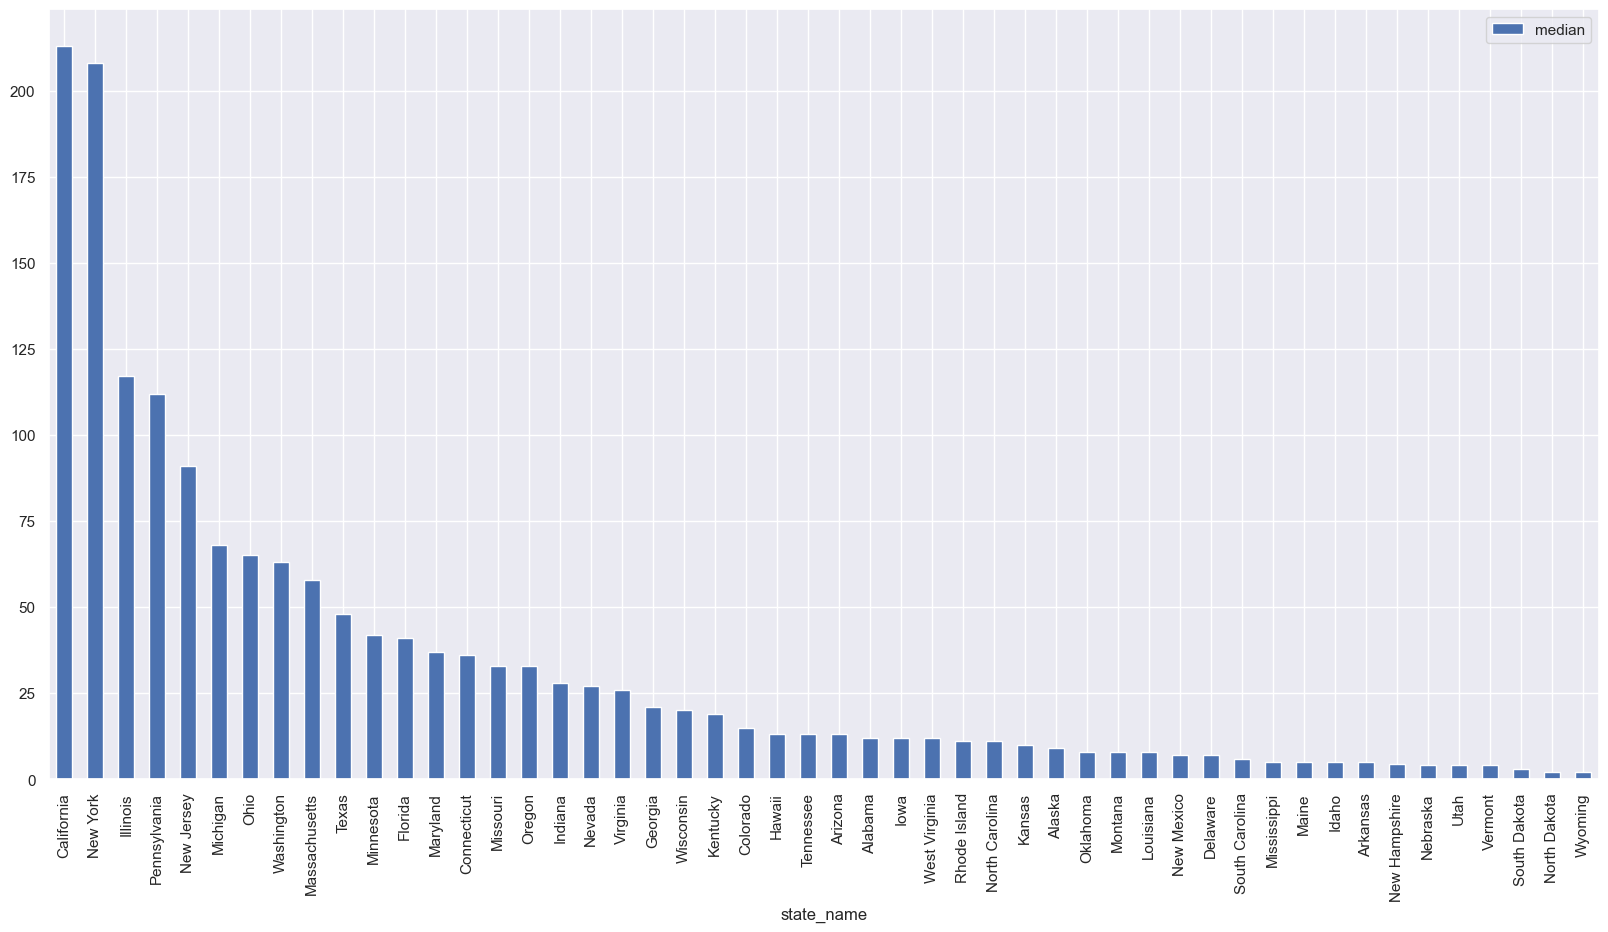

In [36]:
# horizontal bar chart of median number of cases per state_name in med_elec_st_yr sorted high to low
med_elec_st_yr.sort_values(by='median', ascending=False).plot.bar
(x='state_name', y='median', figsize=(20,10))

<AxesSubplot: xlabel='median', ylabel='state_name'>

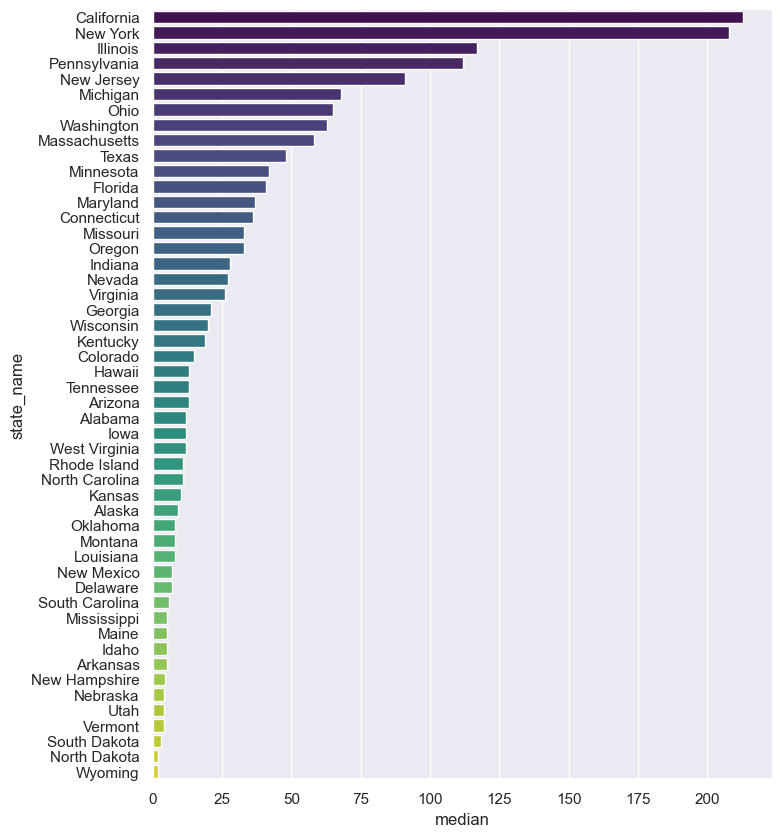

In [39]:
# horizontal bar chart of median number of cases per state_name in med_elec_st_yr sorted high to low
sns.set(rc={"figure.figsize":(8, 10)})
sns.barplot(x="median", y="state_name", data=med_elec_st_yr, palette="viridis",
    order=med_elec_st_yr.sort_values('median',ascending = False).state_name)

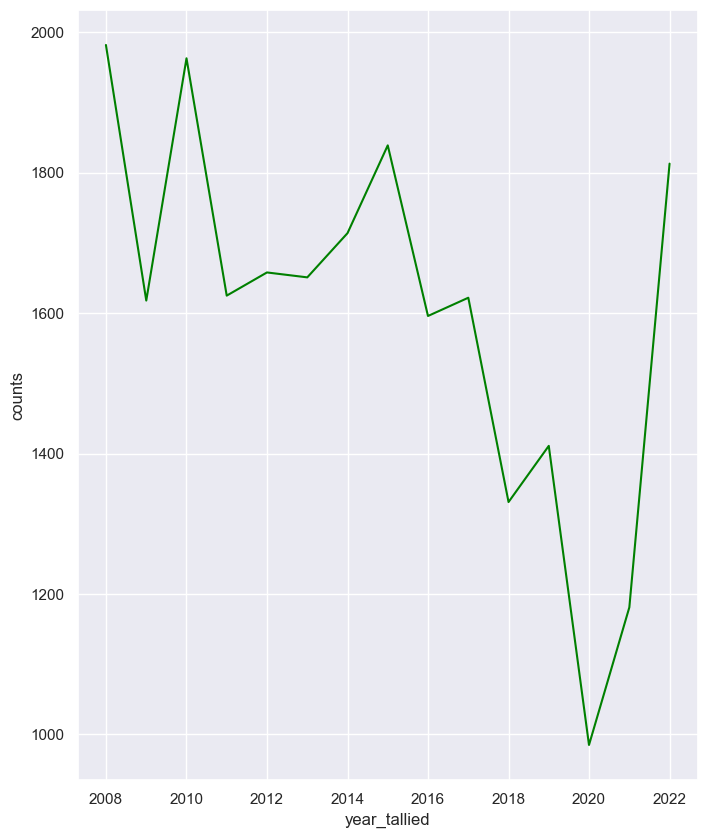

In [40]:
# electoins tallied per year
ax = sns.lineplot(x=tallied_yr['year_tallied'], y=tallied_yr['counts'], data=tallied_yr, color='green')

In [41]:
# create a new colum in df_elec using the reason_closed column where 'Certific. of Representative' is 'unionized' and all other values are 'not unionized'
df_elec['unionized'] = np.where(df_elec['reason_closed'] == 'Certific. of Representative', 'unionized', 'not unionized')
df_elec.head()

,region,case_number,case_name,status,date_filed,date_closed,reason_closed,city,states,unit_id,...,union_to_certify,voting_unit_(unit_a),voting_unit_(unit_b),voting_unit_(unit_c),voting_unit_(unit_d),year_filed,year_closed,year_tallied,state_name,unionized
0,"Region 15, New Orleans, Louisiana",15-RC-308212,"First Student, Inc.",Closed,2022-12-05,2023-01-09,Certific. of Representative,Memphis,TN,A,...,Teamsters Local 667,Included: All full-time and regular part-time...,NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,Tennessee,unionized
1,"Region 18, Minneapolis, Minnesota",18-RC-308305,"UNFI Wholesale, Inc.",Closed,2022-12-05,2023-01-06,Certification of Results,Hopkins,MN,A,...,Teamsters Local No. 120,All full-time and regular part-time inventory ...,NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,Minnesota,not unionized
2,"Region 13, Chicago, Illinois",13-RC-300655,Victory Gardens Theater,Open,2022-08-03,NaT,NaN,Chicago,IL,A,...,NaN,Included:\tAll full-time and regular part-time...,NaN,NaN,NaN,2022-01-01,NaT,2022-01-01,Illinois,not unionized
3,"Region 19, Seattle, Washington",19-RC-306228,Albany General Hospital d/b/a Samaritan Albany...,Closed,2022-10-31,2023-01-09,Certification of Results,Albany,OR,A,...,Oregon Nurses Association,Included: All full-time and regular part-time ...,NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,Oregon,not unionized
4,"Region 20, San Francisco, California",20-RC-307019,Dignity Health d/b/a St. Mary’s Medical Center,Closed,2022-11-14,2023-01-24,Certification of Results,San Francisco,CA,A,...,"Service Employees International Union, United ...","All full-time, regular part-time, and per diem...",NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,California,not unionized


In [43]:
# create new dataframe of unionized and not unionized cases by year
unionized_yr = df_elec.groupby(['year_tallied', 'unionized']).size().reset_index(name='counts')
unionized_yr.head()

,year_tallied,unionized,counts
0,2008-01-01,not unionized,815
1,2008-01-01,unionized,1297
2,2009-01-01,not unionized,638
3,2009-01-01,unionized,1077
4,2010-01-01,not unionized,799


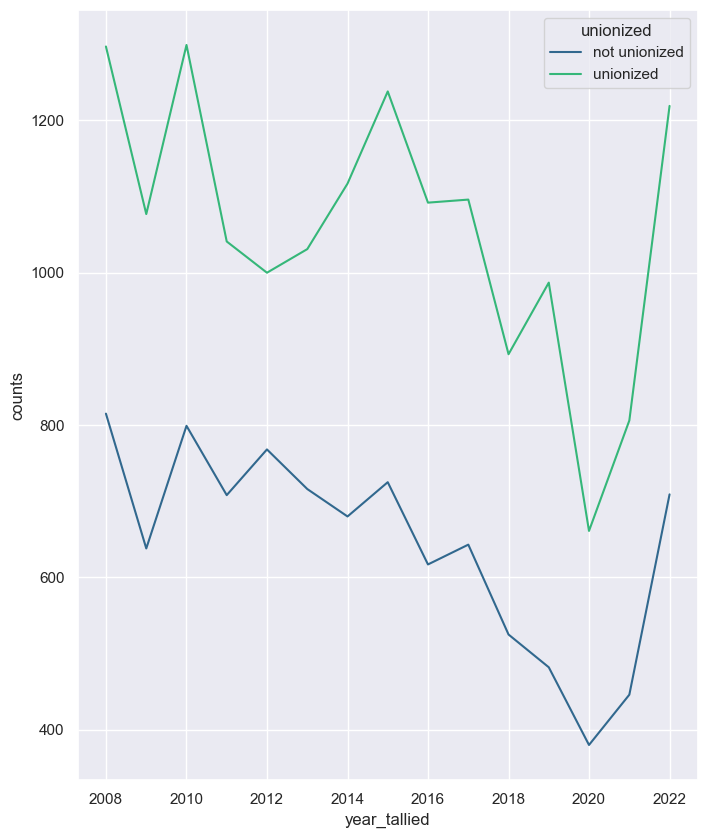

In [46]:
# seaborn line plot of unionized vs not unionized per year
ax = sns.lineplot(x=unionized_yr['year_tallied'], y=unionized_yr['counts'], hue=unionized_yr['unionized'], data=unionized_yr, palette='viridis')




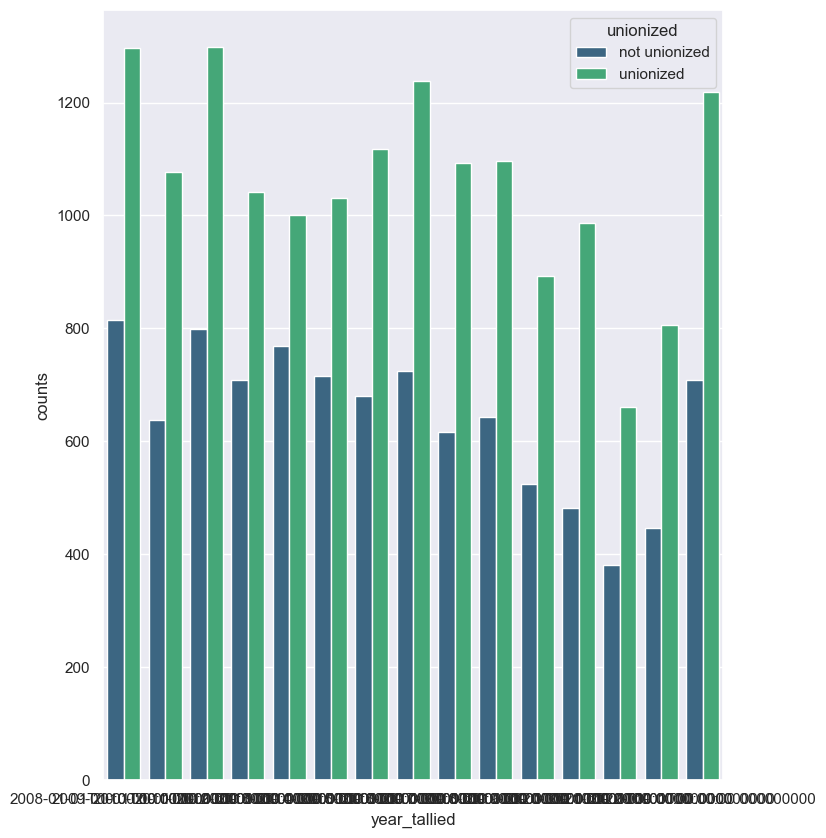

In [47]:
# seaborn stacked bar plot of unionized vs not unionized per year
ax = sns.barplot(x=unionized_yr['year_tallied'], y=unionized_yr['counts'], hue=unionized_yr['unionized'], data=unionized_yr, palette='viridis')

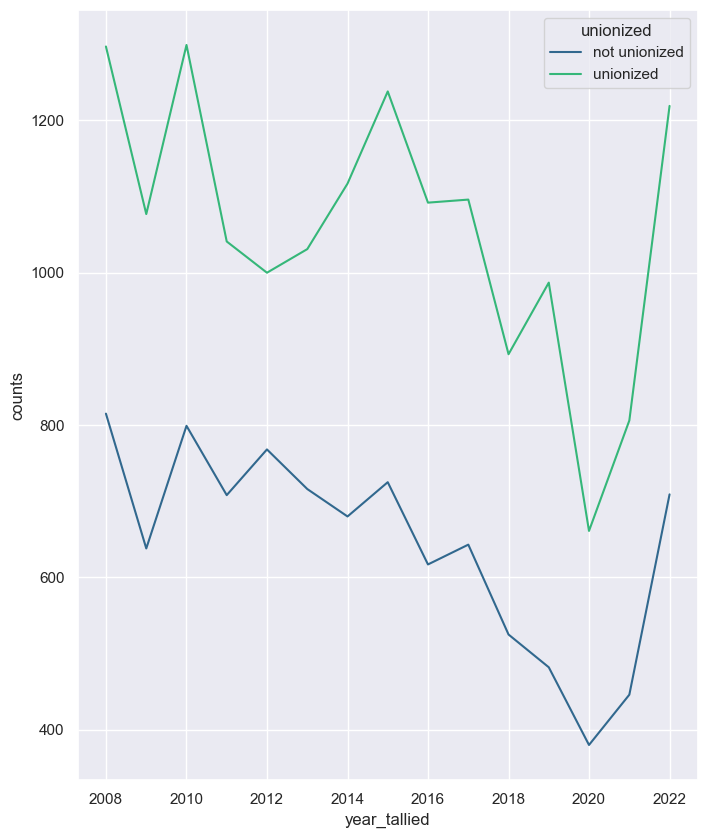

In [48]:
# seaborn area plot of unionized vs not unionized per year
ax = sns.lineplot(x=unionized_yr['year_tallied'], y=unionized_yr['counts'], hue=unionized_yr['unionized'], data=unionized_yr, palette='viridis')

In [51]:
# from df_elec caluclate the percentage of total_ballots that were votes_for_union1
df_elec['percent_votes_for_union1'] = df_elec['votes_for_labor_union1'] / df_elec['total_ballots_counted']
df_elec.head()


,region,case_number,case_name,status,date_filed,date_closed,reason_closed,city,states,unit_id,...,voting_unit_(unit_a),voting_unit_(unit_b),voting_unit_(unit_c),voting_unit_(unit_d),year_filed,year_closed,year_tallied,state_name,unionized,percent_votes_for_union1
0,"Region 15, New Orleans, Louisiana",15-RC-308212,"First Student, Inc.",Closed,2022-12-05,2023-01-09,Certific. of Representative,Memphis,TN,A,...,Included: All full-time and regular part-time...,NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,Tennessee,unionized,1.000000
1,"Region 18, Minneapolis, Minnesota",18-RC-308305,"UNFI Wholesale, Inc.",Closed,2022-12-05,2023-01-06,Certification of Results,Hopkins,MN,A,...,All full-time and regular part-time inventory ...,NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,Minnesota,not unionized,0.888889
2,"Region 13, Chicago, Illinois",13-RC-300655,Victory Gardens Theater,Open,2022-08-03,NaT,NaN,Chicago,IL,A,...,Included:\tAll full-time and regular part-time...,NaN,NaN,NaN,2022-01-01,NaT,2022-01-01,Illinois,not unionized,NaN
3,"Region 19, Seattle, Washington",19-RC-306228,Albany General Hospital d/b/a Samaritan Albany...,Closed,2022-10-31,2023-01-09,Certification of Results,Albany,OR,A,...,Included: All full-time and regular part-time ...,NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,Oregon,not unionized,1.000000
4,"Region 20, San Francisco, California",20-RC-307019,Dignity Health d/b/a St. Mary’s Medical Center,Closed,2022-11-14,2023-01-24,Certification of Results,San Francisco,CA,A,...,"All full-time, regular part-time, and per diem...",NaN,NaN,NaN,2022-01-01,2023-01-01,2022-01-01,California,not unionized,0.866667


In [55]:
# group percentage of votes for union1 by year
votes_for_union1_yr = df_elec.groupby(['year_tallied'])['percent_votes_for_union1'].median().reset_index(name='median')
votes_for_union1_yr.head()

,year_tallied,median
0,2008-01-01,0.600000
1,2009-01-01,0.592593
2,2010-01-01,0.600000
3,2011-01-01,0.597791
4,2012-01-01,0.571429


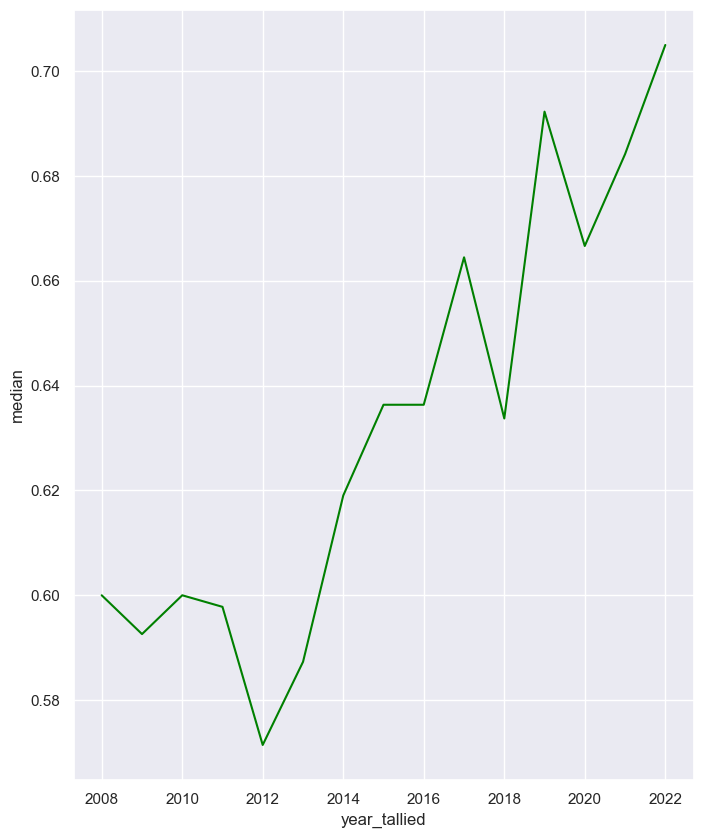

In [56]:
# plot median percentage of votes for union1 by year
ax = sns.lineplot(x=votes_for_union1_yr['year_tallied'], y=votes_for_union1_yr['median'], data=votes_for_union1_yr, color='green')